- Total sample size N = 4000; 3000 with Y=0 and 1000 with Y=1. Y is the target variable.
- There are three clinical variables, X1, X2 and X3. Every Xi is dichotomous ({0,1}).
- Determine a fraction vector for 16 combinatorial stata.
- Generate N samples' data records for Y and X1, X2 and X3.
- Report the codes in python.
  - Hint:
  - Make a bifurcation tree with 16 leaf nodes.
  - The top root has one node and it divides into to two nodes then 4 nodes appear and then 8 then 16.
  - Give values to all nodes (1 + 2 + 4 + 8 + 16 = 31 nodes). The top node's value should be 1.
  - The sum of values of each layer should be 1. The sum of two nodes should correspond to the node from which they are produced.
  - The ratio of two values of each bifurcation should be away from evenness, that means the bifurcating variable is informative.

作戦：  
16個のベクトルを作る ? 
x1は一番はじめにやる感度重視の検査、x3は確定診断のための検査と考える  
nodeにvalue(頻度？)を与える？

とりあえずヒントの意味がわからないところがあるので、まずは思った通りにランダムに作る

In [4]:
import numpy as np
import numpy.random as rd
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

In [ ]:
a = np.array([0, 1])
y = np.random.choice(a, 4000, replace=True, p= [0.1,0.9])
x3 = np.random.choice(a, 4000, replace=True, p= [0.2,0.8])
x2 = np.random.choice(a, 4000, replace=True, p= [0.5,0.5])
x1 = np.random.choice(a, 4000, replace=True, p= [0.8,0.2])
df = pd.DataFrame({ 'Y' : y,
                    'X1' : x1,
                    'X2' : x2,
                    'X3' : x3,
                  })

In [7]:
df.head(3)

,X1,X2,X3,Y
0,0,1,1,0
1,0,1,1,1
2,0,0,1,1


In [16]:
df_setumeiinsi = df.loc[:,"X1":"X3"]

In [23]:
df.loc[:,"Y"].head()

0    0
1    1
2    1
3    1
4    1
Name: Y, dtype: int64

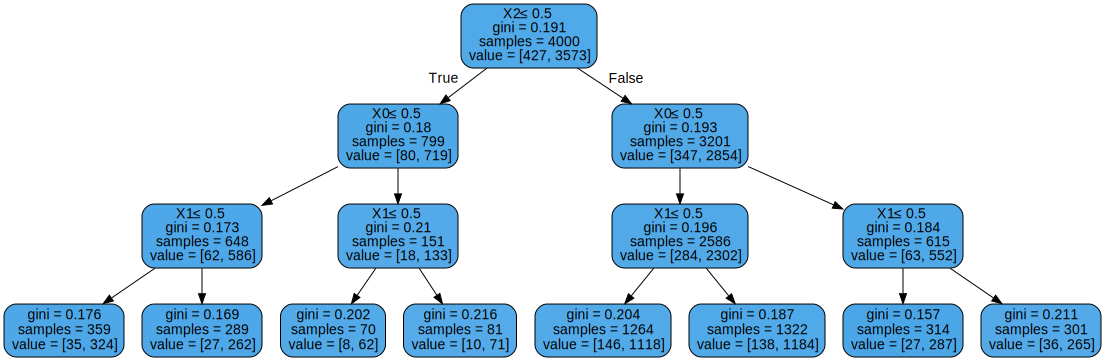

In [21]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_setumeiinsi, df.loc[:,"Y"])
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [25]:
#データ型を変えてみる
a = np.array(["0","1"])
y = np.random.choice(a, 4000, replace=True, p= [0.1,0.9])
x3 = np.random.choice(a, 4000, replace=True, p= [0.2,0.8])
x2 = np.random.choice(a, 4000, replace=True, p= [0.5,0.5])
x1 = np.random.choice(a, 4000, replace=True, p= [0.8,0.2])
df2 = pd.DataFrame({ 'Y' : y,
                    'X1' : x1,
                    'X2' : x2,
                    'X3' : x3,
                  })

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
X1    4000 non-null object
X2    4000 non-null object
X3    4000 non-null object
Y     4000 non-null object
dtypes: object(4)
memory usage: 125.1+ KB


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
X1    4000 non-null int64
X2    4000 non-null int64
X3    4000 non-null int64
Y     4000 non-null int64
dtypes: int64(4)
memory usage: 125.1 KB


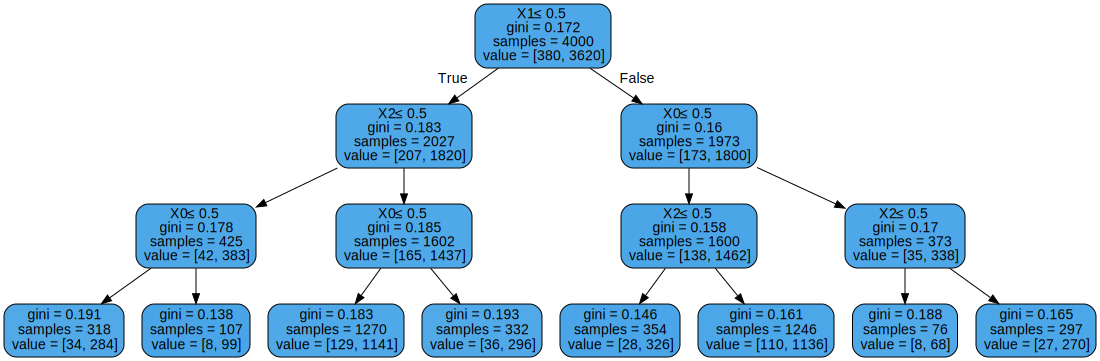

In [26]:
df2_setumeiinsi = df2.loc[:,"X1":"X3"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df2_setumeiinsi, df2.loc[:,"Y"])
dot_data = tree.export_graphviz(clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

なぜか0.5で区切られている。  
<以下参考>

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  